# A/B TESTING(ANOVA) FOR FAST FOOD MARKETING CAMPAIGN

We will try to analyze the data to see the story of the dataset and understand whether there is a need to preprocess for our data or not.

After that we will apply A/B Testing to check that our new product is profitable or not.

# Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, f_oneway, kruskal

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Getting Data

In [2]:
data = pd.read_csv("../input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")
df = data.copy()

# Analyzing the Data

In [3]:
def df_summary(df):
    print("############### OBSERVATIONS-COLUMNS COUNTS ###############")
    print("\n")
    print(df.shape)
    print("############### INDEX ###############")
    print("\n")
    print(df.index)
    print("############### COLUMNS ###############")
    print("\n")
    print(df.columns)
    print("############### DATAFRAME INFORMATIONS ###############")
    print("\n")
    print(df.info())
    print("############### DATAFRAME INFORMATIONS ###############")
    print("\n")
    print(df.describe().T)
    print("\n")
    print(df.head())
    
df_summary(df)

############### OBSERVATIONS-COLUMNS COUNTS ###############


(548, 7)
############### INDEX ###############


RangeIndex(start=0, stop=548, step=1)
############### COLUMNS ###############


Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')
############### DATAFRAME INFORMATIONS ###############


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB
None
############### DATAFRAME

In [4]:
def missing_value_analysis(df):
    print("Is there any missing value on the dataset?")
    print(df.isnull().values.any())
    missing = df.isnull().values.any()

    if (missing == True):
        print("############### MISSING VALUE COUNTS BY VARIABLES ###############")
        print(df.isnull().sum())
        print("############### TOTAL MISSING VALUE COUNTS ###############")
        print(df.isnull().sum().sum())
    else:
        pass

missing_value_analysis(df)

Is there any missing value on the dataset?
False


In [5]:
def unique_counts(df, var):
    return df[var].nunique()
    
print("####### UNIQUE VALUE COUNTS BY VARIABLES #######", "\n")
for i in df.columns:
    if (i == "SalesInThousands"):
        continue
    else:
        print( i  + " = " + str(unique_counts(df, i)))

####### UNIQUE VALUE COUNTS BY VARIABLES ####### 

MarketID = 10
MarketSize = 3
LocationID = 137
AgeOfStore = 25
Promotion = 3
week = 4


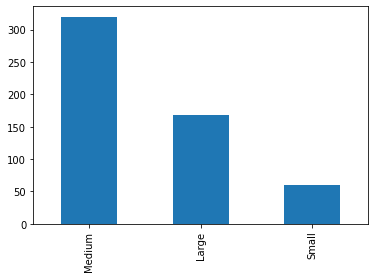

In [6]:
df["MarketSize"].value_counts().plot(kind = "bar");

In [7]:
df.groupby("MarketSize").agg({"SalesInThousands": ["count", "mean", "sum"]})

SalesInThousands               
                      count  mean      sum
MarketSize                                
Large                   168 70.12 11779.61
Medium                  320 43.99 14075.31
Small                    60 57.41  3444.56

In [8]:
df.groupby(["MarketSize", "week"]).agg({"SalesInThousands": ["count", "mean", "sum"]})

SalesInThousands              
                           count  mean     sum
MarketSize week                               
Large      1                  42 70.79 2973.32
           2                  42 68.66 2883.58
           3                  42 70.65 2967.19
           4                  42 70.37 2955.52
Medium     1                  80 44.40 3552.31
           2                  80 44.38 3550.25
           3                  80 44.11 3528.60
           4                  80 43.05 3444.15
Small      1                  15 56.25  843.68
           2                  15 58.68  880.13
           3                  15 55.35  830.23
           4                  15 59.37  890.52

# Applying A/B Testing

#### -----------------------------------------------------------

## 1 - A/B Testing (just for "SalesInThousands")

In this section, we will apply a/b testing just for "SalesInThousands" variable according to the weeks

### Normality Assumption

##### H0: Normally Distributed
##### H1: Not Normally Distributed

In [9]:
test_stat, pvalue = shapiro(df.loc[df["week"] == 1, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["week"] == 2, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["week"] == 3, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["week"] == 4, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.8891, p-value = 0.0000
Test Stat = 0.9485, p-value = 0.0001
Test Stat = 0.9335, p-value = 0.0000
Test Stat = 0.9477, p-value = 0.0000


##### We reject H0 
##### There is no normal distribution

### ANOVA Testing

##### H0: M1 = M2 = M3 = M4
##### H1: At least one group's mean are different

In [10]:
test_stat, pvalue = kruskal(df.loc[df["week"] == 1, "SalesInThousands"],
                                 df.loc[df["week"] == 2, "SalesInThousands"],
                                df.loc[df["week"] == 3, "SalesInThousands"],
                                df.loc[df["week"] == 4, "SalesInThousands"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0710, p-value = 0.9951


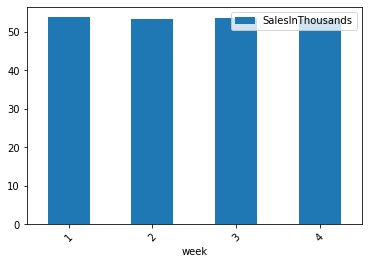

In [11]:
df.groupby(["week"]).agg({"SalesInThousands": "mean"}).plot(kind = "bar", rot = 45);

## 2 - A/B Testing (for "SalesInThousands", "Promotion" and "AgeOfStore")

In this section, I will create new variable which is called as "Score".It includes multiplication of these three variables.I want to consider impacts of these variables and compare with A/B Testing

In [12]:
df["Score"] = df["SalesInThousands"] * df["AgeOfStore"] * df["Promotion"]

### Normality Assumption

##### H0: Normally Distributed
##### H1: Not Normally Distributed

In [13]:
test_stat, pvalue = shapiro(df.loc[df["week"] == 1, "Score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["week"] == 2, "Score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["week"] == 3, "Score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["week"] == 4, "Score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.7759, p-value = 0.0000
Test Stat = 0.7797, p-value = 0.0000
Test Stat = 0.7768, p-value = 0.0000
Test Stat = 0.7720, p-value = 0.0000


##### We reject H0 
##### There is no normal distribution

### ANOVA Testing

##### H0: M1 = M2 = M3 = M4
##### H1: At least one group's mean are different

In [14]:
test_stat, pvalue = kruskal(df.loc[df["week"] == 1, "Score"],
                                 df.loc[df["week"] == 2, "Score"],
                                df.loc[df["week"] == 3, "Score"],
                                df.loc[df["week"] == 4, "Score"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0176, p-value = 0.9994


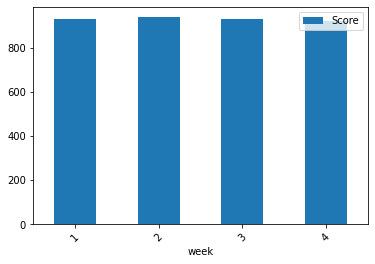

In [15]:
df.groupby(["week"]).agg({"Score": "mean"}).plot(kind = "bar", rot = 45);

# Final Note

#### As a result, there is no significant difference among weeks.So we can say that our new item is not more profitable than the other products.If we put the new product to our menu, there might not be big difference.We can try to develop different product.